# **DIABETES DATASET: K-PROTOTYPES CLUSTERING**

<span style="font-size: 20px;">Created by *Oleksiy Danilin*</span>

## **Mixed Model (Patients and Non-Patients)** 

### **Model** 

<span style="font-size: 16px;">In this book, we run a k-prototypes model, based on the original dataset with mixed data types.

In [7]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Diabetes_binary.csv')

# Check the data types to separate categorical and numerical features
print(df.dtypes)

Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


In [9]:
# Assuming the columns to be categorized based on the dataset info
categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                       'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 
                       'Education', 'Income']

numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']

# Separate the categorical and numerical data
categorical_data = df[categorical_columns]
numerical_data = df[numerical_columns]

# Print shapes and first few rows of each DataFrame
print("Categorical data shape:", categorical_data.shape)
print("Numerical data shape:", numerical_data.shape)

print("\nFirst few rows of categorical data:\n", categorical_data.head())
print("\nFirst few rows of numerical data:\n", numerical_data.head())

Categorical data shape: (70692, 18)
Numerical data shape: (70692, 3)

First few rows of categorical data:
    HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         0          1       0       0                     0   
1       1         1          1       1       1                     0   
2       0         0          1       0       0                     0   
3       1         1          1       1       0                     0   
4       0         0          1       1       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0             1       0        1                  0              1   
1             0       1        0                  0              1   
2             1       1        1                  0              1   
3             1       1        1                  0              1   
4             1       1        1                  0              1   

   NoDocbcCost  GenHlth  DiffWalk  Sex 

In [10]:
from sklearn.preprocessing import LabelEncoder

# Print first few rows before encoding
print("Categorical data before encoding:\n", categorical_data.head())

# Apply Label Encoding to categorical columns using .loc[]
label_encoders = {}
for col in categorical_data.columns:
    le = LabelEncoder()
    categorical_data.loc[:, col] = le.fit_transform(categorical_data[col])  # Use .loc[] to modify the column
    label_encoders[col] = le  # Store encoders to reverse the transformation later, if needed

# Print first few rows after encoding
print("\nCategorical data after encoding:\n", categorical_data.head())

Categorical data before encoding:
    HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         0          1       0       0                     0   
1       1         1          1       1       1                     0   
2       0         0          1       0       0                     0   
3       1         1          1       1       0                     0   
4       0         0          1       1       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0             1       0        1                  0              1   
1             0       1        0                  0              1   
2             1       1        1                  0              1   
3             1       1        1                  0              1   
4             1       1        1                  0              1   

   NoDocbcCost  GenHlth  DiffWalk  Sex  Age  Education  Income  
0            0        3         0    1    4   

In [11]:
import numpy as np

# Combine the two dataframes
combined_data = np.concatenate([numerical_data, categorical_data], axis=1)

# Print the shape of the combined data
print("Combined data shape:", combined_data.shape)

# Print the first few rows of the combined data
print("First few rows of combined data:\n", combined_data[:5])

Combined data shape: (70692, 21)
First few rows of combined data:
 [[26  5 30  1  0  1  0  0  0  1  0  1  0  1  0  2  0  1  3  5  7]
 [26  0  0  1  1  1  1  1  0  0  1  0  0  1  0  2  0  1 11  5  7]
 [26  0 10  0  0  1  0  0  0  1  1  1  0  1  0  0  0  1 12  5  7]
 [28  0  3  1  1  1  1  0  0  1  1  1  0  1  0  2  0  1 10  5  7]
 [29  0  0  0  0  1  1  0  0  1  1  1  0  1  0  1  0  0  7  4  7]]


In [12]:
from kmodes.kprototypes import KPrototypes

# Define the model
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42)

# Print combined_data shape to verify data before clustering
print("Combined data shape:", combined_data.shape)

# Print first few rows of combined_data to ensure it's correct
print("First few rows of combined_data:\n", combined_data[:5])

# Fit the model and predict cluster labels
clusters = kproto.fit_predict(combined_data, categorical=[i for i in range(len(numerical_columns), len(combined_data[0]))])

# Print the cluster labels explicitly
print("Cluster labels:", clusters)

# Check if the number of clusters matches the number of rows in the DataFrame
print(f"Number of clusters: {len(clusters)}, Number of rows in df: {len(df)}")

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Display the first few rows of the dataframe with the cluster labels
print("DataFrame with clusters:\n", df.head())

# Now, group by clusters to get the mean for each variable
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

Combined data shape: (70692, 21)
First few rows of combined_data:
 [[26  5 30  1  0  1  0  0  0  1  0  1  0  1  0  2  0  1  3  5  7]
 [26  0  0  1  1  1  1  1  0  0  1  0  0  1  0  2  0  1 11  5  7]
 [26  0 10  0  0  1  0  0  0  1  1  1  0  1  0  0  0  1 12  5  7]
 [28  0  3  1  1  1  1  0  0  1  1  1  0  1  0  2  0  1 10  5  7]
 [29  0  0  0  0  1  1  0  0  1  1  1  0  1  0  1  0  0  7  4  7]]
Cluster labels: [0 2 2 ... 2 2 2]
Number of clusters: 70692, Number of rows in df: 70692
DataFrame with clusters:
    Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         0          1   26       0       0   
1                0       1         1          1   26       1       1   
2                0       0         0          1   26       0       0   
3                0       1         1          1   28       1       0   
4                0       0         0          1   29       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  No

In [13]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# For categorical features, you can check the value counts
for col in categorical_columns:
    print(df.groupby('Cluster')[col].value_counts())

         Diabetes_binary    HighBP  HighChol  CholCheck        BMI    Smoker  \
Cluster                                                                        
0               0.700882  0.733054  0.648698   0.987196  31.965784  0.576393   
1               0.637216  0.666369  0.647925   0.972631  32.058159  0.607467   
2               0.448980  0.521975  0.489767   0.973553  29.227856  0.441829   

           Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  ...  \
Cluster                                                          ...   
0        0.129869              0.285668      0.505810  0.586723  ...   
1        0.123159              0.228321      0.538004  0.533244  ...   
2        0.043164              0.114476      0.756854  0.625716  ...   

         AnyHealthcare  NoDocbcCost   GenHlth   MentHlth   PhysHlth  DiffWalk  \
Cluster                                                                         
0             0.962019     0.148053  3.909727   2.632559  25.276092  0.63804

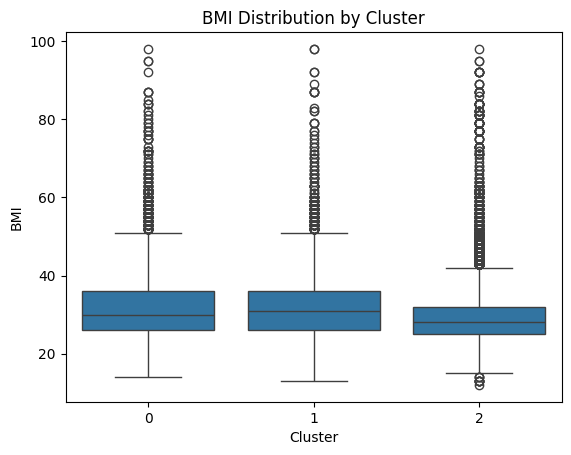

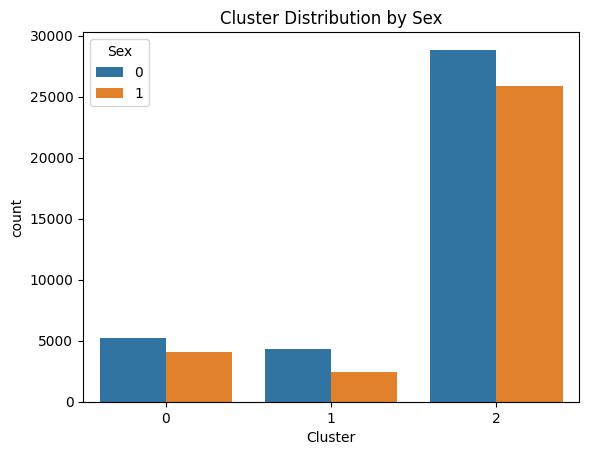

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for BMI across clusters
sns.boxplot(x='Cluster', y='BMI', data=df)
plt.title('BMI Distribution by Cluster')
plt.show()

# Count plot for a categorical feature
sns.countplot(x='Cluster', hue='Sex', data=df)
plt.title('Cluster Distribution by Sex')
plt.show()

In [15]:
df.to_csv('diabetes_with_clusters.csv', index=False)

### **Clusters' Description**

Cluster 0:
Diabetes prevalence: High (70% have prediabetes or diabetes).
High blood pressure (HighBP): Very common (73%).
High cholesterol (HighChol): Fairly common (65%).
Cholesterol check (CholCheck): Nearly all individuals (99%) have had their cholesterol checked.
BMI: Average BMI of 31.97, indicating obesity.
Smokers: Over half are smokers (58%).
Heart Disease or Stroke: High prevalence of heart disease or stroke (29% heart disease, 13% stroke).
Physical Activity: Moderate engagement in physical activity (50%).
Fruit and Veggie Consumption: Moderate consumption of fruits (59%) and high consumption of vegetables (75%).
Mental and Physical Health: Individuals report high mental health issues (average 2.63 days per month) and severe physical health issues (25 days of poor physical health per month), and 64% report difficulty walking.
Healthcare Access: Almost all (96%) have healthcare coverage.
General Health (GenHlth): Poor general health with a score of 3.9 (scale of 1 to 5).
Demographics:
Sex: 44% female, 56% male.
Age: Older (mean age group around 9.38, likely 55-64 years).
Education: Moderate education level (average of 4.6, possibly high school diploma).
Income: Middle-income level (average income score of 4.75, likely between $35,000-$49,999).

Cluster 1:
Diabetes prevalence: Slightly lower than Cluster 0 (64%).
High blood pressure (HighBP): Slightly lower than Cluster 0 (67%).
High cholesterol (HighChol): Similar to Cluster 0 (65%).
Cholesterol check (CholCheck): Most have had their cholesterol checked (97%).
BMI: Slightly higher than Cluster 0 (BMI of 32.06).
Smokers: High smoking rate (61%).
Heart Disease or Stroke: Lower prevalence than Cluster 0 (23% heart disease, 12% stroke).
Physical Activity: Moderate physical activity (54%).
Fruit and Veggie Consumption: Lower fruit (53%) and veggie (63%) consumption than Cluster 0.
Mental and Physical Health: Individuals report significantly worse mental health issues (average of 26.55 days of poor mental health per month) and severe physical health problems (16.5 days per month), and 56% report difficulty walking.
Healthcare Access: Slightly lower coverage (92%).
General Health (GenHlth): Poor general health (3.8).
Demographics:
Sex: 36% female, 64% male.
Age: Slightly younger than Cluster 0 (average age group around 8.01, likely 45-54 years).
Education: Similar education level to Cluster 0 (average of 4.6).
Income: Slightly lower income level (average score of 4.37).

Cluster 2:
Diabetes prevalence: Significantly lower than Clusters 0 and 1 (45%).
High blood pressure (HighBP): Much lower prevalence (52%).
High cholesterol (HighChol): Lowest (49%).
Cholesterol check (CholCheck): Almost all have had cholesterol checks (97%).
BMI: Lower BMI (29.2), close to overweight range.
Smokers: Lowest percentage of smokers (44%).
Heart Disease or Stroke: Lowest heart disease (11%) and stroke (4%) prevalence.
Physical Activity: Highest engagement in physical activity (76%).
Fruit and Veggie Consumption: Higher consumption of fruits (63%) and veggies (80%) than other clusters.
Mental and Physical Health: Best mental health (average 1.14 days of poor mental health per month) and physical health (1.19 days of poor physical health per month). Only 15% report difficulty walking.
Healthcare Access: Most have healthcare coverage (95%).
General Health (GenHlth): Best general health (2.5).
Demographics:
Sex: 47% female, 53% male.
Age: Younger than Cluster 0 but older than Cluster 1 (average age group 8.52, likely 50-59 years).
Education: Higher education level (average 5.0, possibly some college or higher).
Income: Highest income level (average of 6.02, likely between $50,000-$74,999 or higher).

### **Potential Insights**

SUMMARY: Cluster 0: High prevalence of diabetes, heart disease, and poor physical health. Middle-income older adults with high BMI and poor general health, predominantly male (56%).
Cluster 1: Similar to Cluster 0 but slightly younger, with worse mental health and lower physical activity. This cluster has an even higher percentage of males (64%).
Cluster 2: Healthier cluster with lower prevalence of diabetes and heart disease, better mental and physical health, higher income, and more educated individuals. The gender division is more balanced, with 47% females and 53% males.

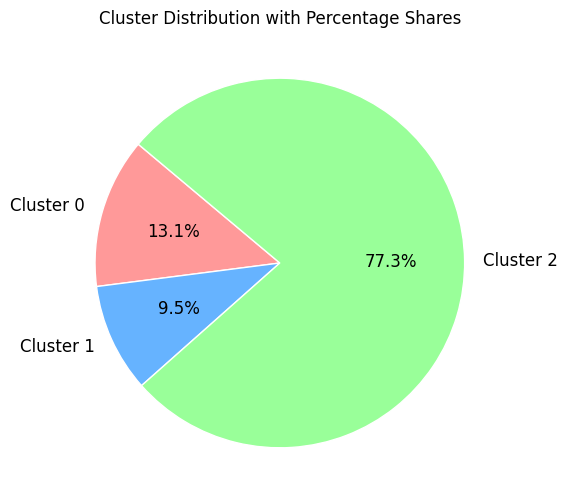

In [24]:
import matplotlib.pyplot as plt

# Data for the clusters
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
colors = ['#ff9999', '#66b3ff', '#99ff99']
cluster_sizes = [9294, 6723, 54675]  # sizes of Cluster 0, Cluster 1, and Cluster 2

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(cluster_sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12}, 
        wedgeprops={'edgecolor': 'white'})

plt.title('Cluster Distribution with Percentage Shares')
plt.show()

Clusters with higher rates of smoking, physical inactivity, or poor diet (e.g., Cluster 0 and Cluster 1) can be the focus of specific behavioral interventions like smoking cessation programs, exercise regimens, or nutritional guidance.

Cluster 0 might be encouraged to join wellness programs focused on managing chronic conditions, while those in Cluster 2 could benefit from general fitness and health promotion activities.

Cluster 0 has higher rates of diabetes, high blood pressure, and cholesterol, so they might benefit more from hypertension and cholesterol management programs. Clusters with fewer health issues (Cluster 2) may focus on preventative care.

Regions with more individuals from Cluster 0 (higher diabetes prevalence) may require more diabetes management programs or access to medications.

 Individuals in higher-risk clusters (e.g., Cluster 0) might be offered different premiums based on their likelihood of developing costly medical conditions, while those in healthier clusters might receive lower rates.